In [1]:
from utils import run
import seaborn as sns

from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica

# A

### LSMT

In [2]:
base_dir = './benchmark_data_'
replica = PathReplica(base_dir + LSMTree.name, '/tmp/remote')

#### Max Runs Per Level

In [15]:
df = run(
    [4], [4], [10_000], [20_000],
    [Uniform], [{'seed': [1]}],
    [LSMTree], [{
        'max_runs_per_level': list(range(2, 50, 5)),
        'density_factor': [10],
        'memtable_bytes_limit': [1_000],
        'replica': [None]
    }],
    times=3, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

In [16]:
def lineplot(cat, engine, x, y, data, X='', Y='', title='', ylim=None):
    data = data[data['metric'].isin(y)]
    plot = sns.lineplot(data=data, x=x, y='value', hue='metric')
    if title:
        plot.set_title(f'{Y} vs {X}')
    if X:
        plot.set_xlabel(X)
    if Y:
        plot.set_ylabel(Y)
    if ylim is not None:
        plot.set(ylim=ylim)
    fig = plot.get_figure()
    fig.savefig(f"{cat}-{engine}-{'_'.join(y)}-vs-{x}.png")

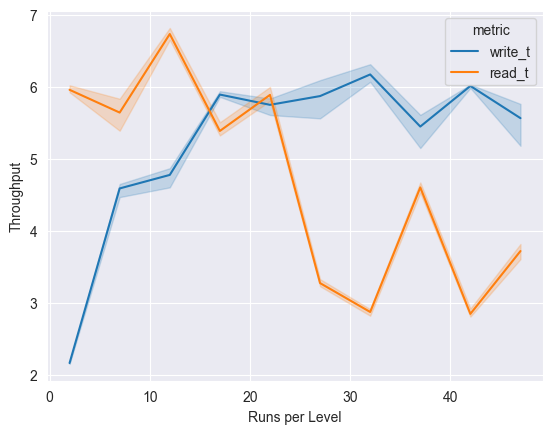

In [17]:
lineplot(
    'A', 'LSMT',
    'max_runs_per_level', ['read_t', 'write_t'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Runs per Level', 'Throughput'
)

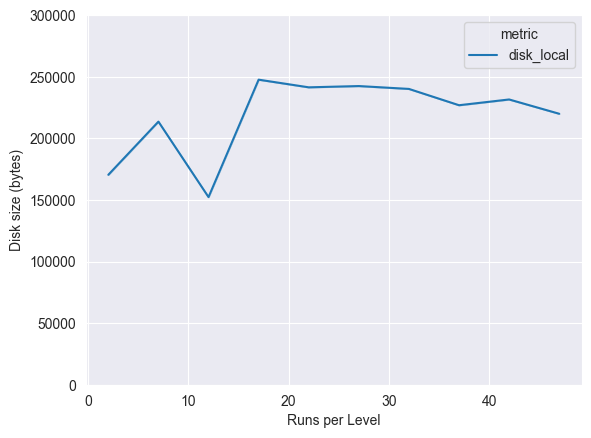

In [18]:
lineplot(
    'A', 'LSMT',
    'max_runs_per_level', ['disk_local'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Runs per Level', 'Disk size (bytes)',
    ylim=(0, 300_000)
)

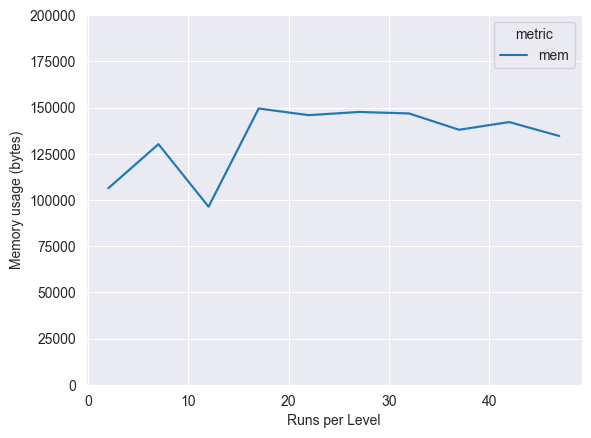

In [20]:
lineplot(
    'A', 'LSMT',
    'max_runs_per_level', ['mem'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Runs per Level', 'Memory usage (bytes)',
    ylim=(0, 200_000)
)

#### Density Factor

In [21]:
df = run(
    [4], [4], [10_000], [10_000],
    [Uniform], [{'seed': [1]}],
    [LSMTree], [{
        'max_runs_per_level': [7],
        'density_factor': list(range(10, 201, 20)),
        'memtable_bytes_limit': [10_000],
        'replica': [None]
    }],
    times=3, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

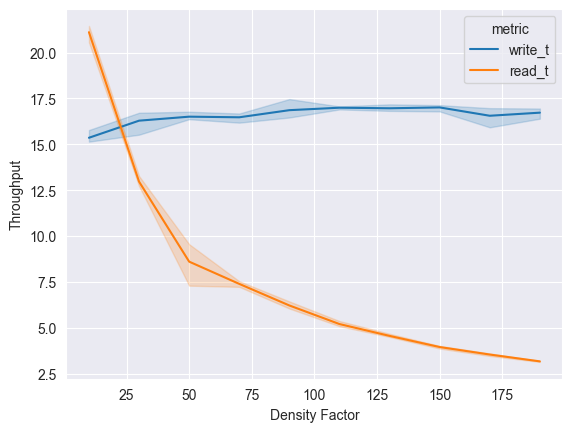

In [22]:
lineplot(
    'A', 'LSMT',
    'density_factor', ['read_t', 'write_t'],
    df[['value', 'density_factor', 'metric']],
    'Density Factor', 'Throughput'
)

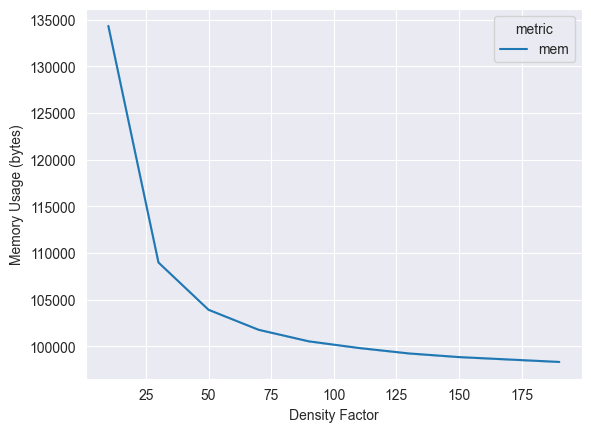

In [23]:
lineplot(
    'A', 'LSMT',
    'density_factor', ['mem'],
    df[['value', 'density_factor', 'metric']],
    'Density Factor', 'Memory Usage (bytes)'
)

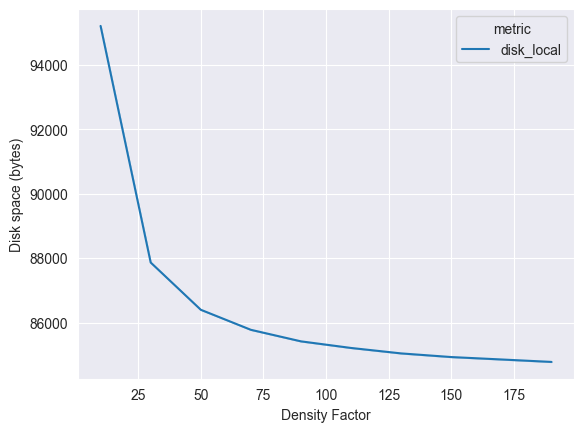

In [24]:
lineplot(
    'A', 'LSMT',
    'density_factor', ['disk_local'],
    df[['value', 'density_factor', 'metric']],
    'Density Factor', 'Disk space (bytes)'
)

#### Memtable Bytes Limit

In [25]:
df = run(
    [4], [4], [10_000], [20_000],
    [Uniform], [{'seed': [1]}],
    [LSMTree], [{
        'max_runs_per_level': [3],
        'density_factor': [10],
        'memtable_bytes_limit': list(range(10_000, 100_001, 5_000)),
        'replica': [None]
    }],
    times=3, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

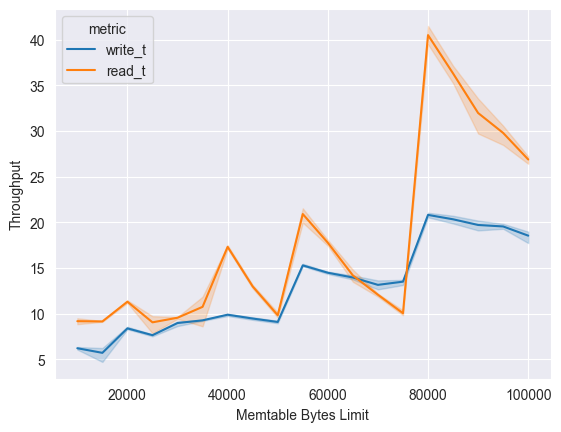

In [26]:
lineplot(
    'A', 'LSMT',
    'memtable_bytes_limit', ['read_t', 'write_t'],
    df[['value', 'memtable_bytes_limit', 'metric']],
    'Memtable Bytes Limit', 'Throughput'
)

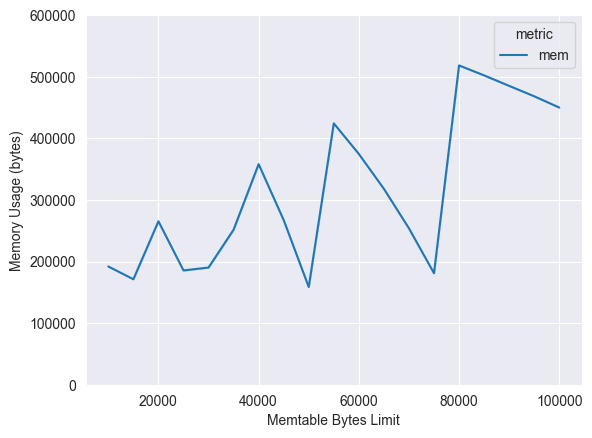

In [28]:
lineplot(
    'A', 'LSMT',
    'memtable_bytes_limit', ['mem'],
    df[['value', 'memtable_bytes_limit', 'metric']],
    'Memtable Bytes Limit', 'Memory Usage (bytes)',
    ylim=(0, 600_000)
)

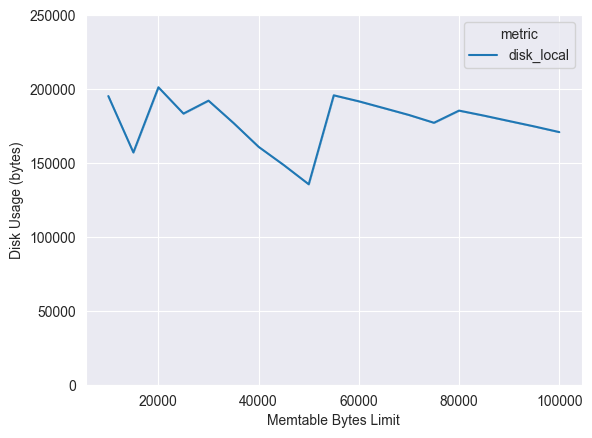

In [29]:
lineplot(
    'A', 'LSMT',
    'memtable_bytes_limit', ['disk_local'],
    df[['value', 'memtable_bytes_limit', 'metric']],
    'Memtable Bytes Limit', 'Disk Usage (bytes)',
    ylim=(0, 250_000)
)

### HLOG

In [57]:
base_dir = './benchmark_data_'
replica = PathReplica(base_dir + HybridLog.name, '/tmp/remote')

#### Max Runs Per Level

In [45]:
df = run(
    [4], [4], [10_000], [20_000],
    [Uniform], [{'seed': [1, 2, 3]}],
    [HybridLog], [{
        'max_runs_per_level': list(range(2, 50, 5)),
        'mem_segment_len': [1_000_000],
        'ro_lag_interval': [1_000],
        'flush_interval': [4_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

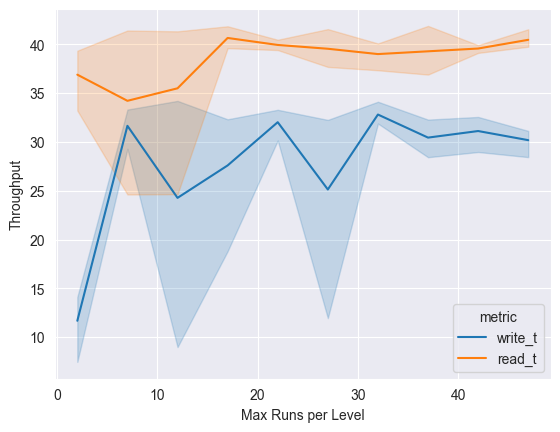

In [46]:
lineplot(
    'A', 'HLOG',
    'max_runs_per_level', ['read_t', 'write_t'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs per Level', 'Throughput'
)

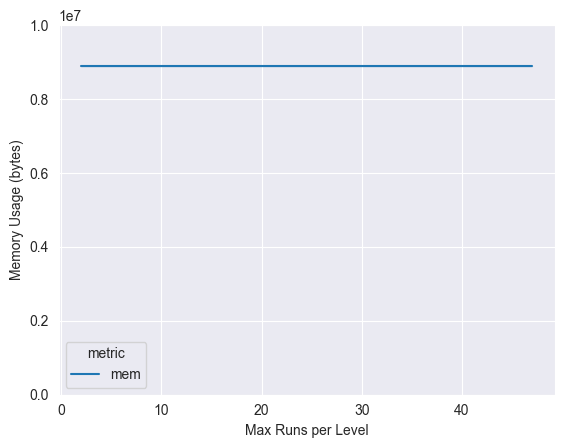

In [50]:
lineplot(
    'A', 'HLOG',
    'max_runs_per_level', ['mem'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs per Level', 'Memory Usage (bytes)',
    ylim=(0, 10000000)
)

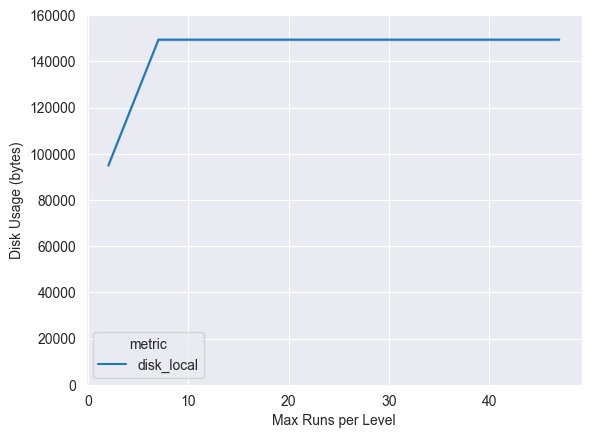

In [51]:
lineplot(
    'A', 'HLOG',
    'max_runs_per_level', ['disk_local'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs per Level', 'Disk Usage (bytes)',
    ylim=(0, 160000)
)

#### Memory Segment Length

In [81]:
df = run(
    [4], [4], [10_000], [10_000],
    [Uniform], [{'seed': [1]}],
    [HybridLog], [{
        'max_runs_per_level': [3],
        'mem_segment_len': list(range(3_000, 50_000, 2_000)),
        'ro_lag_interval': [1_000],
        'flush_interval': [1_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    }],
    times=3, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

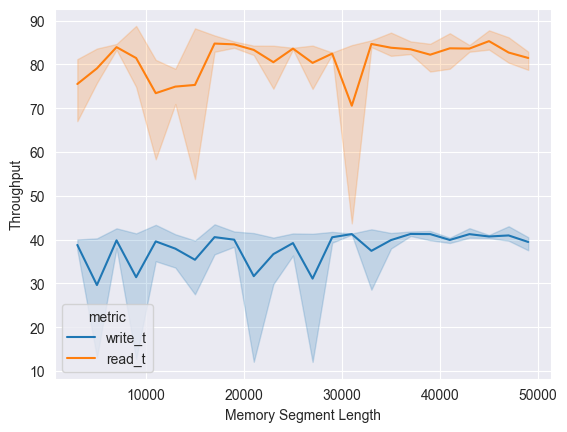

In [82]:
lineplot(
    'A', 'HLOG',
    'mem_segment_len', ['read_t', 'write_t'],
    df[['value', 'mem_segment_len', 'metric']],
    'Memory Segment Length', 'Throughput'
)

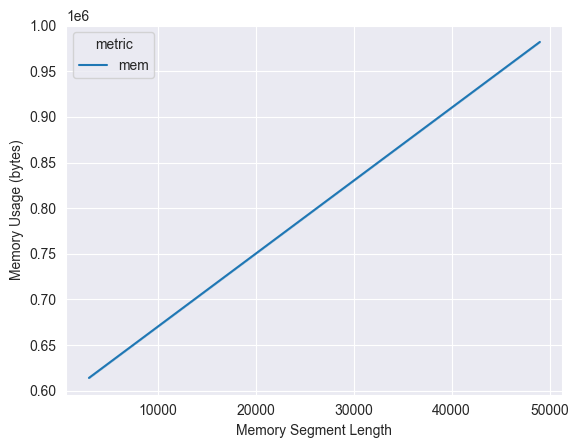

In [83]:
lineplot(
    'A', 'HLOG',
    'mem_segment_len', ['mem'],
    df[['value', 'mem_segment_len', 'metric']],
    'Memory Segment Length', 'Memory Usage (bytes)'
)

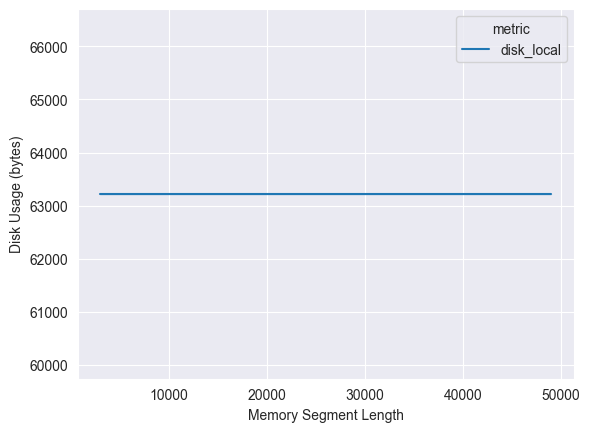

In [84]:
lineplot(
    'A', 'HLOG',
    'mem_segment_len', ['disk_local'],
    df[['value', 'mem_segment_len', 'metric']],
    'Memory Segment Length', 'Disk Usage (bytes)'
)

#### RO Lag Interval

In [97]:
df = run(
    [4], [4], [5_000], [10_000],
    [Uniform], [{'seed': list(range(3))}],
    [HybridLog], [{
        'max_runs_per_level': [3],
        'mem_segment_len': [10_000],
        'ro_lag_interval': list(range(100, 8_000, 100)),
        'flush_interval': [1_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

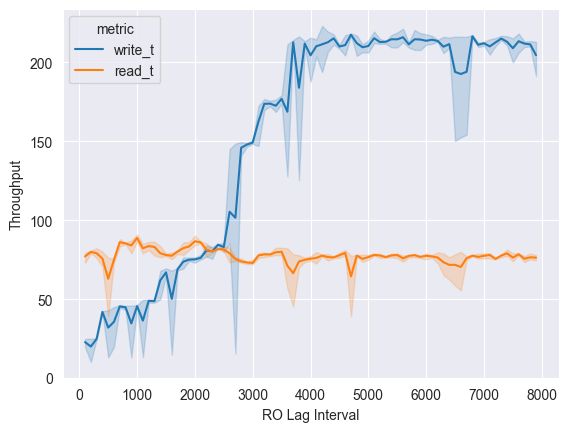

In [98]:
lineplot(
    'A', 'HLOG',
    'ro_lag_interval', ['read_t', 'write_t'],
    df[['value', 'ro_lag_interval', 'metric']],
    'RO Lag Interval', 'Throughput'
)

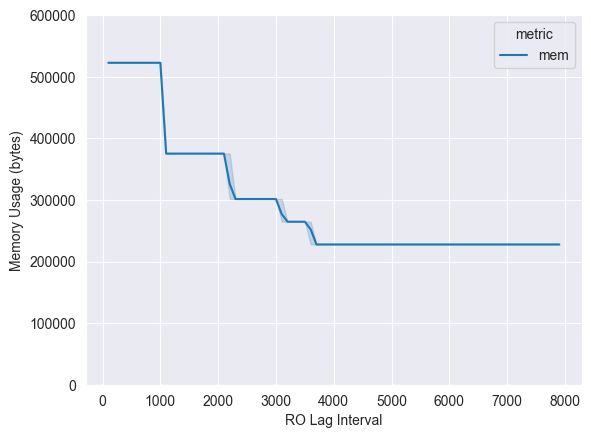

In [101]:
lineplot(
    'A', 'HLOG',
    'ro_lag_interval', ['mem'],
    df[['value', 'ro_lag_interval', 'metric']],
    'RO Lag Interval', 'Memory Usage (bytes)',
    ylim=(0, 600_000)
)

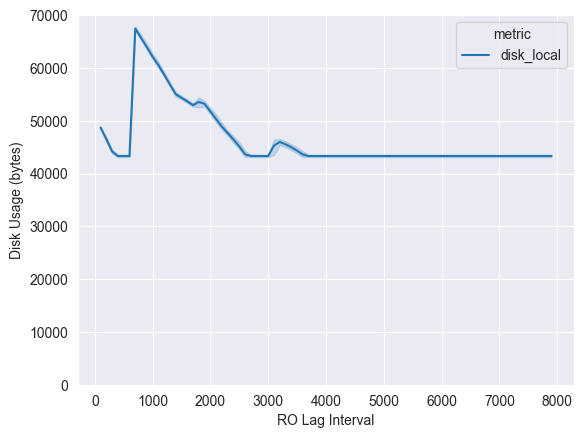

In [102]:
lineplot(
    'A', 'HLOG',
    'ro_lag_interval', ['disk_local'],
    df[['value', 'ro_lag_interval', 'metric']],
    'RO Lag Interval', 'Disk Usage (bytes)',
    ylim=(0, 70000)
)

#### Flush Interval

In [130]:
df = run(
    [4], [4], [10_000], [10_000],
    [Uniform], [{'seed': list(range(3))}],
    [HybridLog], [{
        'max_runs_per_level': [3],
        'mem_segment_len': [32_000],
        'ro_lag_interval': [1_000],
        'flush_interval': list(range(100, 30_000, 1000)),
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

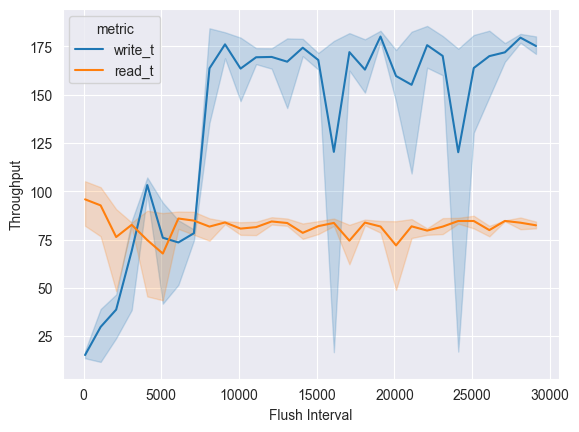

In [131]:
lineplot(
    'A', 'HLOG',
    'flush_interval', ['read_t', 'write_t'],
    df[['value', 'flush_interval', 'metric']],
    'Flush Interval', 'Throughput'
)

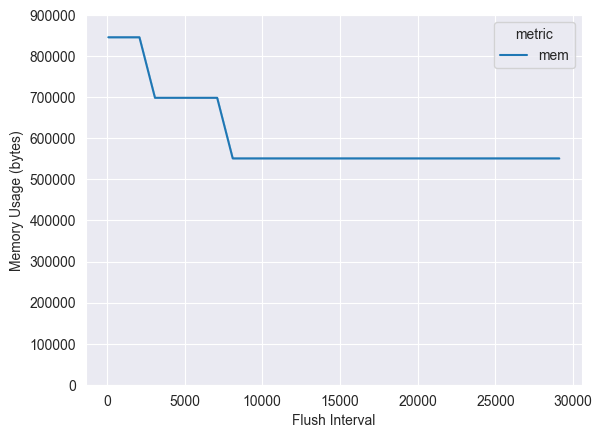

In [134]:
lineplot(
    'A', 'HLOG',
    'flush_interval', ['mem'],
    df[['value', 'flush_interval', 'metric']],
    'Flush Interval', 'Memory Usage (bytes)',
    ylim=(0, 900000)
)

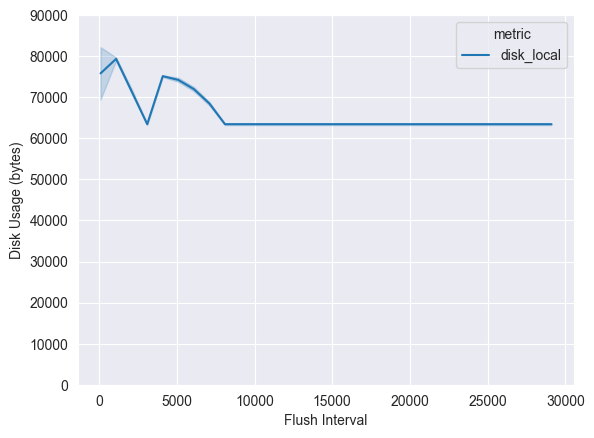

In [135]:
lineplot(
    'A', 'HLOG',
    'flush_interval', ['disk_local'],
    df[['value', 'flush_interval', 'metric']],
    'Flush Interval', 'Disk Usage (bytes)',
    ylim=(0, 90000)
)

#### Compaction

In [154]:
df = run(
    [4], [4], [100_000], list(range(10_000, 100_000, 10_000)),
    [Uniform], [{'seed': [1, 2, 3]}],
    [HybridLog], [{
        'max_runs_per_level': [5],
        'mem_segment_len': [2_000],
        'ro_lag_interval': [500],
        'flush_interval': [500],
        'hash_index': ['dict'],
        'compaction_enabled': [True, False],
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

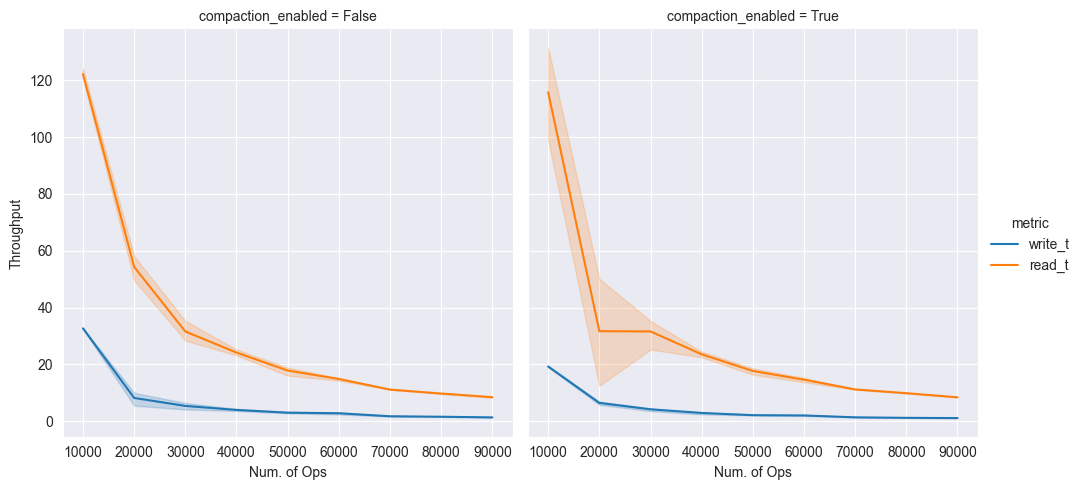

In [162]:
def relplot(cat, engine, x, y, col, data, X='', Y='', title='', ylim=None):
    data = data[data['metric'].isin(y)]
    plot = sns.relplot(data=data, x=x, y='value', col=col, hue='metric', kind='line')
    if title:
        plot.fig.subplots_adjust(top=0.9)
        plot.fig.suptitle(f'{Y} vs {X}')
    if X:
        plot.set_xlabels(X)
    if Y:
        plot.set_ylabels(Y)
    if ylim is not None:
        plot.set(ylim=ylim)
    plot.savefig(f"{cat}-{engine}-{'_'.join(y)}-{col}-vs-{x}.png")

relplot(
    'A', 'HLOG',
    'n_ops', ['read_t', 'write_t'], 'compaction_enabled',
    df[['value', 'n_ops', 'metric', 'compaction_enabled']],
    'Num. of Ops', 'Throughput',
)

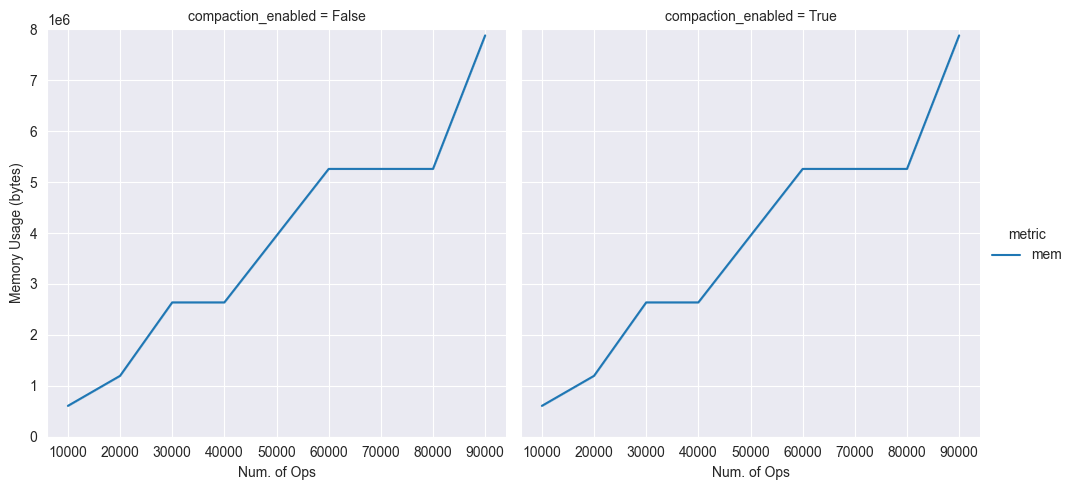

In [166]:
relplot(
    'A', 'HLOG',
    'n_ops', ['mem'], 'compaction_enabled',
    df[['value', 'n_ops', 'metric', 'compaction_enabled']],
    'Num. of Ops', 'Memory Usage (bytes)',
    ylim=(0, 8000000)
)

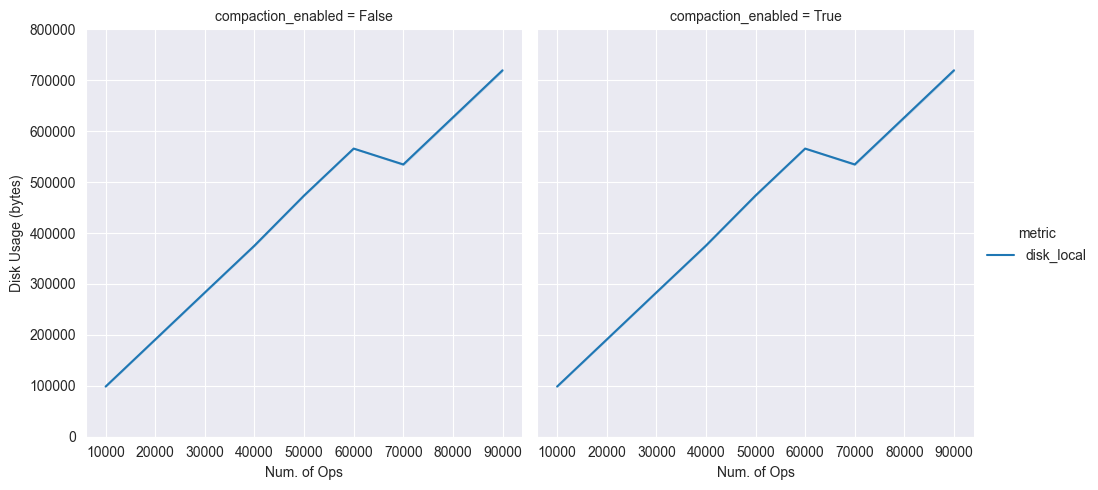

In [165]:
relplot(
    'A', 'HLOG',
    'n_ops', ['disk_local'], 'compaction_enabled',
    df[['value', 'n_ops', 'metric', 'compaction_enabled']],
    'Num. of Ops', 'Disk Usage (bytes)',
    ylim=(0, 800000)
)

## ALOG

#### Max Runs Per Level

In [180]:
df = run(
    [4], [4], [10_000], [10_000],
    [Uniform], [{'seed': list(range(5))}],
    [AppendLog], [{
        'max_runs_per_level': list(range(2, 50, 5)),
        'threshold': [100],
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

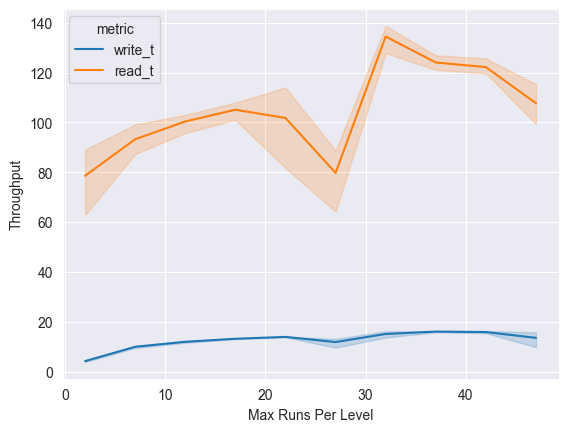

In [188]:
lineplot(
    'A', 'ALOG',
    'max_runs_per_level', ['read_t', 'write_t'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs Per Level', 'Throughput',
)

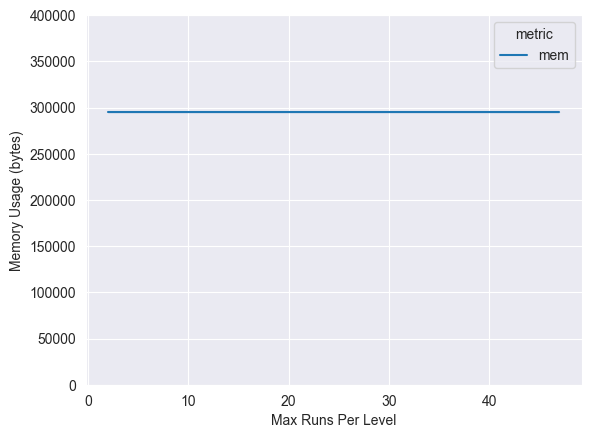

In [185]:
lineplot(
    'A', 'ALOG',
    'max_runs_per_level', ['mem'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs Per Level', 'Memory Usage (bytes)',
    ylim=(0, 400000)
)

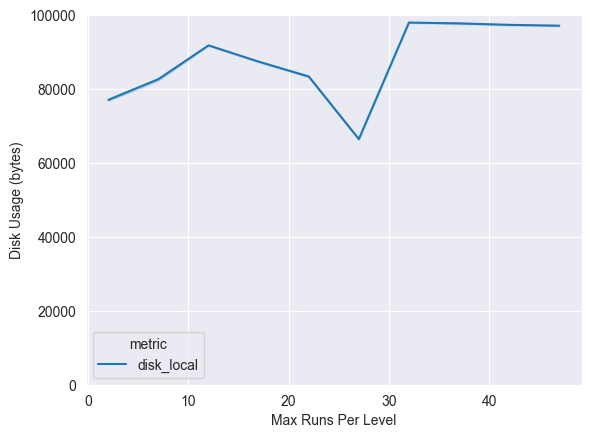

In [187]:
lineplot(
    'A', 'HLOG',
    'max_runs_per_level', ['disk_local'],
    df[['value', 'max_runs_per_level', 'metric']],
    'Max Runs Per Level', 'Disk Usage (bytes)',
    ylim=(0, 100000)
)

#### Threshold

In [192]:
df = run(
    [4], [4], [10_000], [10_000],
    [Uniform], [{'seed': list(range(3))}],
    [AppendLog], [{
        'max_runs_per_level': [3],
        'threshold': list(range(100, 10_000, 500)),
        'replica': [None]
    }],
    times=1, base_dir=base_dir,
    measure_cpu=False, measure_mem=True, measure_write=True,
    measure_read=True, measure_recovery=False, measure_disk_local=True,
    measure_disk_remote=False,
    return_df=True
)

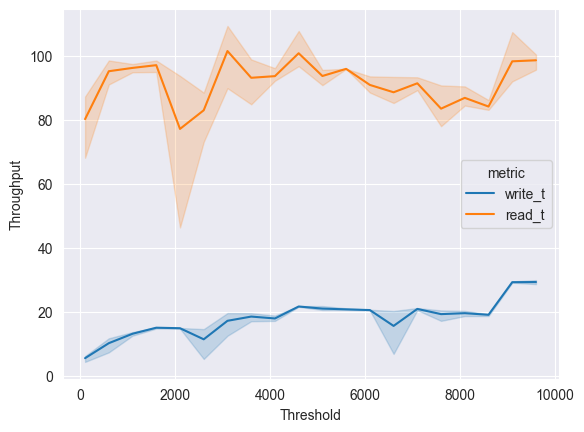

In [193]:
lineplot(
    'A', 'ALOG',
    'threshold', ['read_t', 'write_t'],
    df[['value', 'threshold', 'metric']],
    'Threshold', 'Throughput',
)

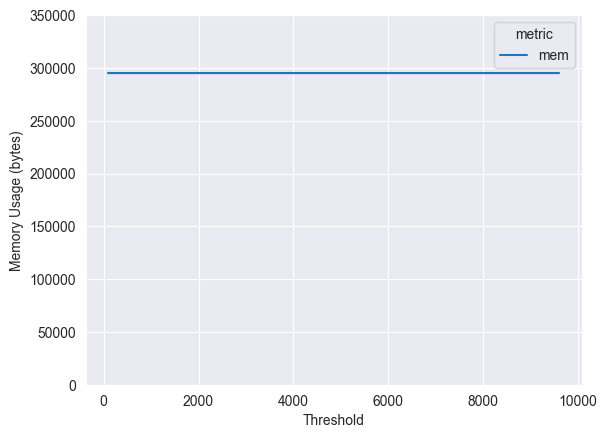

In [196]:
lineplot(
    'A', 'ALOG',
    'threshold', ['mem'],
    df[['value', 'threshold', 'metric']],
    'Threshold', 'Memory Usage (bytes)',
    ylim=(0, 350000)
)

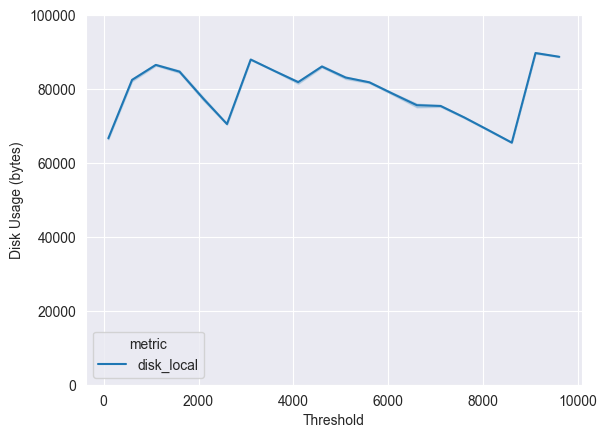

In [198]:
lineplot(
    'A', 'HLOG',
    'threshold', ['disk_local'],
    df[['value', 'threshold', 'metric']],
    'Threshold', 'Disk Usage (bytes)',
    ylim=(0, 100000)
)